In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_csv('AirtrafficA4.csv')
month_mapping = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUNE':6, 'JULY':7, 'AUG':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DEC':12}
 
# Data Cleaning
df['MONTH'] = df['MONTH'].str.strip().map(month_mapping)
df['PASSENGERS CARRIED'] = df['PASSENGERS CARRIED'].str.replace(',','',regex=False).fillna('160000').map(int)   
df['date'] = pd.to_datetime(df[['YEAR','MONTH']].assign(day=1))

df_prophet = df[['date', 'PASSENGERS CARRIED']].rename(columns={'date': 'ds', 'PASSENGERS CARRIED': 'y'})
df_prophet = df_prophet.sort_values(by='ds')
df_prophet.reset_index(drop=True, inplace=True)

# Adding a new column to the dataframe to indicate the COVID-19 period
df_prophet['covid'] = 0
df_prophet.loc[(df_prophet['ds'] > '2020-03-01') & (df_prophet['ds'] <= '2022-03-01'), 'covid'] = 1



00:13:08 - cmdstanpy - INFO - Chain [1] start processing
00:13:08 - cmdstanpy - INFO - Chain [1] done processing


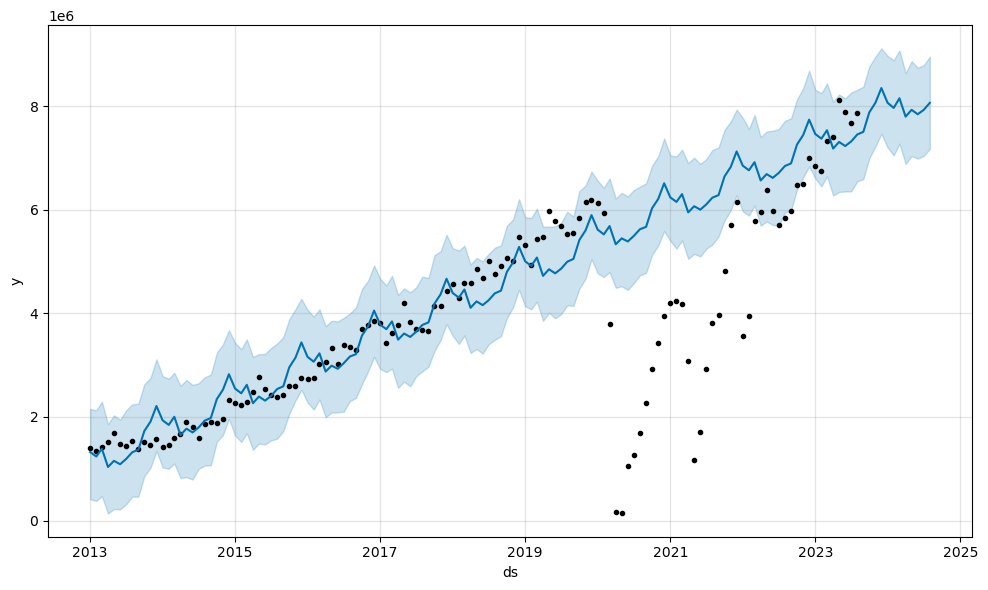

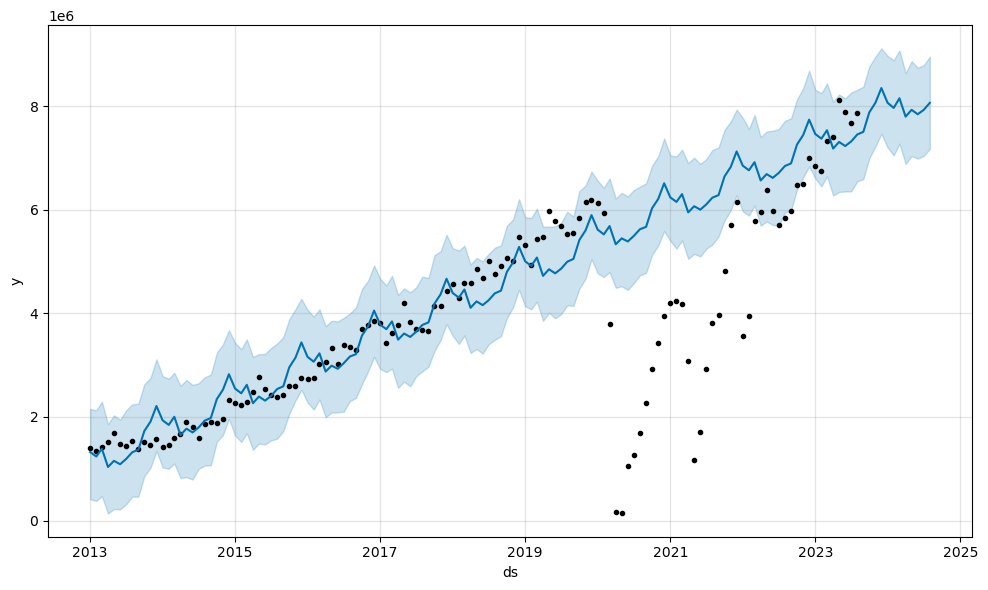

In [3]:
# Fitting the model
model = Prophet()
model.add_regressor('covid')
model.fit(df_prophet)
future = model.make_future_dataframe(periods=12, freq='M')

# No covid luckily 
future['covid'] = [0]*len(future)
forecast = model.predict(future)

model.plot(forecast)

In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(forecast[['ds', 'yhat']].tail(12))

            ds       yhat
128 2023-08-31 7502594.84
129 2023-09-30 7877975.95
130 2023-10-31 8064723.62
131 2023-11-30 8348627.96
132 2023-12-31 8064482.18
133 2024-01-31 7965127.14
134 2024-02-29 8150683.80
135 2024-03-31 7796004.45
136 2024-04-30 7927590.65
137 2024-05-31 7842771.85
138 2024-06-30 7926221.53
139 2024-07-31 8063155.28
